# OPTIMIZATION TD2 - Notebook

## 2nd part

$$
\begin{cases} 
  -x1 \leq 0 \\
  -x2 \leq 0 \\
  3x1-4x2 \leq 1 \\
  x2 \leq 1
\end{cases}
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from simplexe import simplexe

Describe the ball situated at the position xc and radius and write the objective of the design in terms of an optimization of the radius of such a ball.

$$
\{ x \mid |x - x_c| \leq \rho \} = B(x_c, \rho)
$$

Maximize $\rho$

$$
B(x_c, \rho) \in P
$$

$$
x_c \in D \Rightarrow x_c^{(1)} = x_c^{(2)} \Rightarrow \begin{bmatrix} 
1 \\ 
-1 
\end{bmatrix}
x = 0
$$

TO COMPLETE (give alexandre correction to gpt)

Initialization of data

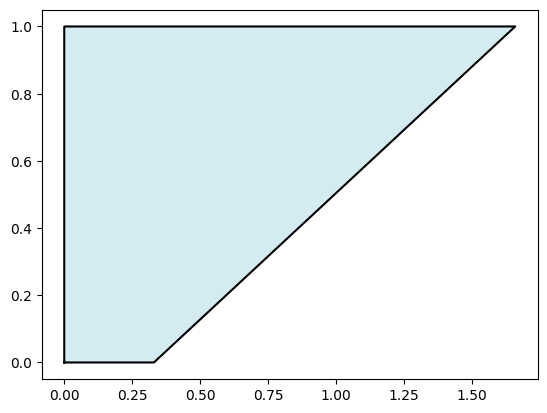

In [ ]:
PV = np.array([[0, 0], [0, 1], [1.66, 1], [0.33, 0]])  # Pv are the vertices of the polyhedron P
A = np.array([[0, -1], [-1, 0], [3, -4], [0, 1]])
b = np.array([0, 0, 1, 1])

pgn = Polygon(PV)

x, y = pgn.exterior.xy
plt.fill(x, y, color='lightblue', alpha=0.5)
plt.plot(x, y, color='black')
plt.show()


Normalizing the half-space representation

In [16]:
# Normalize the half-space representation so that each constraint has a norm = 1
A_norm = A.copy()  # To avoid modifying the original A matrix
b_norm = b.copy()  # To avoid modifying the original b vector

for i in range(A.shape[0]):
    norm_A = np.linalg.norm(A[i, :])  # Calculate the norm of the row
    if norm_A != 0:  # Check to avoid division by zero
        b_norm[i] = b_norm[i] / norm_A  # Normalize b[i]
        A_norm[i, :] = A[i, :] / norm_A  # Normalize the row A[i, :]
    else:
        # If the norm is zero, handle the case (e.g., leave the row unchanged)
        print(f"Row {i} has zero norm, skipping normalization.")

Row 2 has zero norm, skipping normalization.


LP Formulation for Chebyshev Ball Construction

In [ ]:
# Create the matrices for the LP formulation of the Chebyshev ball construction
# Maximize c * x subject to A_bar * x = b_bar

# Objective function c (to maximize the radius of the Chebyshev ball)
c = np.zeros(A_norm.shape[1] + 1)  # c has one more element for the radius
c[-1] = 1  # The objective is to maximize the radius, hence the last element in c is 1

# Matrix A_bar and vector b_bar for the LP formulation
A_bar = np.hstack([A_norm, np.ones((A_norm.shape[0], 1))])  # Add an extra column for the radius term
b_bar = b_norm  # b_bar is just the normalized b vector

# Display the results
print("A_bar:", A_bar)
print("b_bar:", b_bar)
print("Objective vector c:", c)

A_bar: [[ 0. -1.  1.]
 [-1.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  1.]]
b_bar: [0 0 0 1]
Objective vector c: [0. 0. 1.]


Using the Simplexe Method (Implementation of Simplexe Needed)

In [19]:
# Assuming the 'simplexe' function is available (you need to implement it separately or use an existing simplex method)
# For now, we'll leave this as a placeholder.

# Using the procedure simplexe.m
# Simplexe function call and extracting the results
_, _, _, X, _ = simplexe(A_bar, b_bar, c)

# Extract the center (xc) and radius (r) of the Chebyshev ball
xc = X[:2]
r = X[2]

The dimensions of b do not match the dimensions of A.


TypeError: cannot unpack non-iterable NoneType object

Plotting the Results

In [ ]:
# Plot the result
plt.plot(xc[0], xc[1], '*')  # Center of the Chebyshev radius
plt.plot(*pgn.exterior.xy)  # Plot the polyhedron

# Plot the points for each constraint
for i in range(A.shape[0]):
    plt.plot(xc[0] + r * A[i, 0], xc[1] + r * A[i, 1], '*')

# Ellipse plot (you need to implement `ellipplot` or use an alternative)
# ellipplot(np.eye(2), r**2, 'b', xc) 

# Plotting additional reference lines
plt.plot(np.linspace(-1, 6, 100), np.linspace(-1, 6, 100), 'k--')
plt.plot(*pgn.exterior.xy)  # Plot the polyhedron again
plt.show()